# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 03 de Octubre, 2021 23:59
</div>

##### Tarea colaborativa con Fernanda Arelle, Sebastían Ibarra y Patricio Barber

### Importaciones

In [137]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
#Para escribir con Sympy
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import Symbol
#Para graficar en 3d
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from ipywidgets import interact, fixed, widgets, IntSlider, FloatSlider, interact_manual

### Código de clases pasadas útil para esta tarea

In [114]:
class RegresionLineal:
    def __init__(self, alpha=0.03, max_iters=10000, tols=0.00001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m    

In [115]:
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('Edad (yr)')
    ax[0].set_ylabel('Altura (m)')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

In [116]:
def plotGuess(x, y, interceptor, pendiente):
    
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    plt.scatter(x,y, label="data")
    plt.plot(x, modelo(x, interceptor, pendiente), label='Guess')
    plt.xlabel('Edad (yr)')
    plt.ylabel('Altura (m)')
    plt.legend(loc="best")

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

Tenemos que $$
\hat{\textbf{y}} = \mathbf\beta_0 + \mathbf\beta_1 \textbf{x}
$$

Por lo que 

$$\textbf{J}(\beta_0, \beta_1) = \frac{1}{2m}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \hat{y}^{(i)}(x^{(i)}))^2 = \frac{1}{2m}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$

Ahora, tenemos una constante $\frac{1}{2n}$ que multiplica una suma de funciones derivables $\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$
Por lo que para encontrar la derivada parcial con respecto a $\beta_1$ hay que derivar cada uno de los sumandos con respecto a $\beta_1$.

Ahora si, derivemos

In [117]:
#Definiendo todas las variables que usaremos
xsym = Symbol('x')
ysym = Symbol('y')
isym = Symbol('i')
msym = Symbol('m')
beta0 = Symbol('beta0')
beta1 = Symbol('beta1')

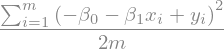

In [118]:
#Escribiendo la función que queremos derivar
func_costo = 1/(2*msym)*Sum((Indexed(ysym,isym)-beta0-beta1*Indexed(xsym,isym))**2,(isym,1,msym))
func_costo

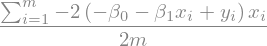

In [119]:
#Derivando con respecto a beta1 usando sympy
derivada1 = diff(func_costo, beta1)
derivada1

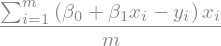

In [120]:
#Simplificando la expresión
simplify(derivada1)

Notemos que es la derivada anterior es igual a la expresión $\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j$, con $j=1$

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [121]:
edad = np.loadtxt('edad-Copy1.dat')
altura = np.loadtxt('altura-Copy1.dat')

In [122]:
edad

array([2.0658746, 2.3684087, 2.5399929, 2.5420804, 2.549079 , 2.7866882,
       2.9116825, 3.035627 , 3.1146696, 3.1582389, 3.3275944, 3.3793165,
       3.4122006, 3.4215823, 3.5315732, 3.6393002, 3.6732537, 3.9256462,
       4.0498646, 4.2483348, 4.3440052, 4.3826531, 4.4230602, 4.6102443,
       4.6881183, 4.9777333, 5.0359967, 5.0684536, 5.4161491, 5.4395623,
       5.4563207, 5.5698458, 5.6015729, 5.6877617, 5.7215602, 5.8538914,
       6.1978026, 6.3510941, 6.4797033, 6.7383791, 6.8637686, 7.0223387,
       7.0782373, 7.1514232, 7.4664023, 7.5973874, 7.7440717, 7.7729662,
       7.8264514, 7.9306356])

In [123]:
altura

array([0.77918926, 0.91596757, 0.90538354, 0.90566138, 0.9389889 ,
       0.9668474 , 0.96436824, 0.91445939, 0.93933944, 0.96074971,
       0.89837094, 0.91209739, 0.94238499, 0.96624578, 1.05265   ,
       1.0143791 , 0.95969426, 0.96853716, 1.0766065 , 1.1454978 ,
       1.0340625 , 1.0070009 , 0.96683648, 1.0895919 , 1.0634462 ,
       1.1237239 , 1.0323374 , 1.0874452 , 1.0702988 , 1.1606493 ,
       1.0778037 , 1.1069758 , 1.0971875 , 1.1648603 , 1.1411796 ,
       1.0844156 , 1.1252493 , 1.1168341 , 1.1970789 , 1.2069462 ,
       1.1251046 , 1.1235672 , 1.2132829 , 1.2522652 , 1.2497065 ,
       1.1799706 , 1.1897299 , 1.3029934 , 1.2601134 , 1.2562267 ])

### a) Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

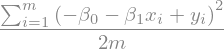

In [124]:
#Calculando la regla de correspondencia para obtener la función J
func_costo = 1/(2*msym)*Sum((Indexed(ysym,isym)-beta0-beta1*Indexed(xsym,isym))**2,(isym,1,msym))
func_costo

In [134]:
# Definiendo función de costo
def sumaJ(beta0,beta1):
    valoresJ=0
    for i in range(len(altura)):
        valoresJ = valoresJ + (altura[i]-beta0-beta1*edad[i])**2/(2*len(edad))
    return valoresJ

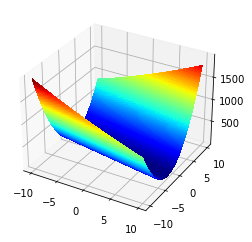

In [135]:
#Gráfica 3D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
beta0 = np.arange(-10,10,0.1)
beta1 = np.arange(-10,10,0.1)

B0, B1 = np.meshgrid(beta0, beta1)
J = sumaJ(B0,B1)
ax.plot_surface(B0,B1,J, rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0, antialiased=False)

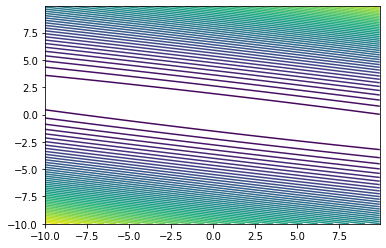

In [136]:
#Gráfica de contorno
plt.contour(B0, B1, J, len(edad))
plt.show()

### **(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

In [15]:
r = RegresionLineal()
r.gradientDescent(edad,altura)

La función convergió con beta: [0.57873101 0.095071  ] en la iteración 455


<function matplotlib.pyplot.show(close=None, block=None)>

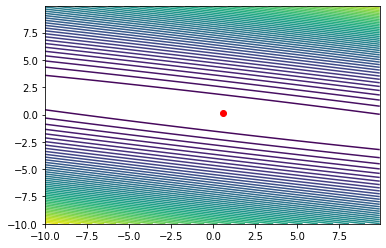

In [16]:
plt.contour(B0, B1, C, 50)
plt.plot(r.beta[0],r.beta[1],'ro')
plt.show

### **(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

In [140]:
def iterando(i):
    plt.contour(B0, B1, J, 100)
    plt.plot(r.beta[0],r.beta[1],'go')
    plt.plot(r.historia['beta'][i][0], r.historia['beta'][i][1],'ro')
    plt.show

interactive(children=(IntSlider(value=0, description='i', max=454), Output()), _dom_classes=('widget-interact'…

<function __main__.iterando(i)>

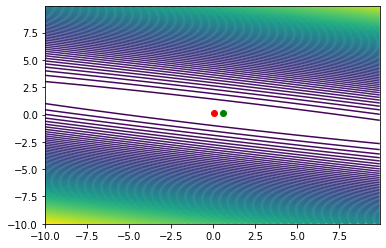

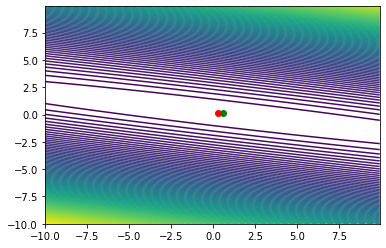

In [141]:
interact(iterando, i=IntSlider(min=0, max= 454, step=1, value=0))

### **(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [142]:
def step_size(alpha=0.03):
    r=RegresionLineal(alpha)
    r.gradientDescent(edad, altura)
    return r.beta

In [143]:
interact_manual(step_size,
                alpha=FloatSlider(value=0.0001,
    min=0.0001,
    max=0.1,
    step=0.00001))

interactive(children=(FloatSlider(value=0.0001, description='alpha', max=0.1, min=0.0001, step=1e-05), Button(…

<function __main__.step_size(alpha=0.03)>

## Problema 3

##### **(a)**  Usando los datos de `chirps.txt`

In [10]:
%cat chirps-Copy1.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


##### Entrenar una regresión lineal. Grafique los datos y el mejor modelo. 

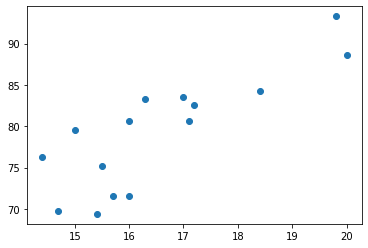

In [50]:
datos = np.loadtxt("chirps-Copy1.txt") #Crear un arreglo con los datos de chirps-Copy1
x=[]
y=[]
for i in datos: #Crea una lista de datos de la variable x y una lista de daots de la variable y
    x.append(float(i[0]))
    y.append(float(i[1]))
coordX=np.array(x) #Se convierten las listas en arreglos para poder graficarlos
coordY=np.array(y)
plt.scatter(coordX,coordY, label="chirps") #Se grafica los datos para tener más o menos una idea de cómo debería de quedar la regresión lineal

In [51]:
#Se aplica la Regresión Lineal que se vio en clase
rl= RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001) #Aquí no utilizamos las misma alphas, max_iters ni tols del código de la clase
rl.gradientDescent(coordX,coordY)

La función convergió con beta: [22.26350136  3.44531603] en la iteración 123659


In [58]:
#Se crean nuevas funciones para modificar el nombre de los ejes ya que en la que vimos en clase los ejes son edad y altura
def plotModelo3(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('Chirps/second')
    ax[0].set_ylabel('Temperature (º F)')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

def plotGuess3(x, y, interceptor, pendiente):
    
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    plt.scatter(x,y, label="data")
    plt.plot(x, modelo(x, interceptor, pendiente), label='Guess')
    plt.xlabel('Chirps/second')
    plt.ylabel('Temperature (º F)')
    plt.legend(loc="best")

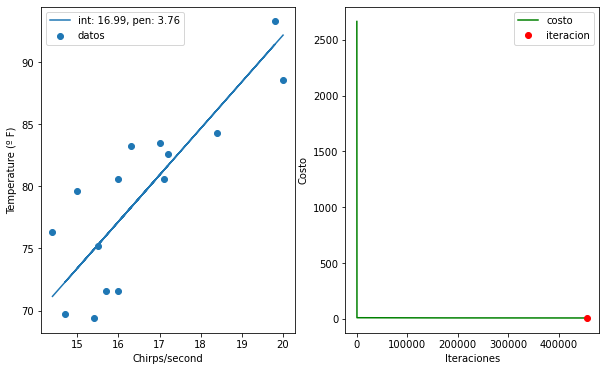

In [45]:
#Gráfica regresión lineal con grafica de iteraciones/costo
plotModelo3(coordX,coordY,rl,456856-1)

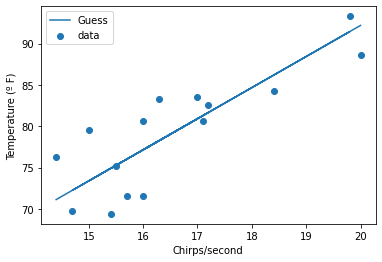

In [59]:
#Gráfica regresión lineal simple
plotGuess3(coordX, coordY, 16.99, 3.76)

##### Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

La regresión lineal en la página web está dada por la siguiente ecuación:

In [94]:
Eq(ysym, 3.41*(xsym) + 22.85)

Notemos que la ecuación que obtuvimos en este ejercicio tiene la siguiente forma:

In [85]:
Eq(ysym, 3.44531603*(xsym) + 22.26350136)

De esta manera, podemos concluir que se acerca bastante bien a la que fue calculada en la página web dado que la diferencia en la pendiente es de al rededor 0.04 y la diferencia con la intersección con el eje y es de 0.6.
Es importante resaltar que para llegar a estos resultados se modificaron los valores, tanto de alpha como de max_iters y tols. Al jugar con los números notamos que el alpha = 0.03 era un learning rate que daba un mayor margen de error, por lo que jugué con los valores hasta llegar a 0.003. Además, bajo la lógica que entre mayores iteraciones mayor precisión, se aumentó el número de max_iters a 1000000. Por último, se dejó el mismo valor de tols ya que era lo suficientemente pequeño para ser los suficientemente preciso, sin embargo, notemos que cuando corremos el programa toma más tiempo. 


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

#### **(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal

In [62]:
#Se escribieron manualmente los valores correspondiente a cada variable del Anscombe's quartet
x1=np.array([10.,8.,13.,9.,11.,14.,6.,4.,12.,7.,5.])
y1=np.array([8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68])
x2=np.array([10,8,13,9,11,14,6,4,12,7,5])
y2=np.array([9.14,8.14,8.74,8.77,9.26,8.1,6.13,3.1,9.13,7.26,4.74])
x3=np.array([10,8,13,9,11,14,6,4,12,7,5])
y3=np.array([7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73])
x4=np.array([8,8,8,8,8,8,8,19,8,8,8])
y4=np.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.5,5.56,7.91,6.89])

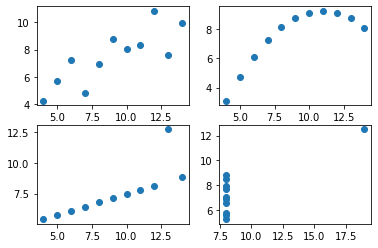

In [63]:
#Se graficaron usando subplot
graf, cuad = plt.subplots(2,2)

cuad[0,0].scatter(x1,y1)
cuad[0,1].scatter(x2,y2)
cuad[1,0].scatter(x3,y3)
cuad[1,1].scatter(x4,y4)

Calculando y graficando la regresión lineal del **primer** par columnas del cuarteto de Anscombe

In [65]:
#Regresión lineal de x1 y y1
RL1=RegresionLineal(alpha=0.0003, max_iters=1000000, tols= 0.000001)
RL1.gradientDescent(x1,y1)

La función convergió con beta: [2.47216482 0.55236589] en la iteración 52408


In [66]:
#Se crean nuevas funciones para modificar el nombre de los ejes ya que en la que vimos en clase los ejes son edad y altura
def plotModelo4(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('X')
    ax[0].set_ylabel('Y')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

def plotGuess4(x, y, interceptor, pendiente):
    
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    plt.scatter(x,y, label="data")
    plt.plot(x, modelo(x, interceptor, pendiente), label='Guess')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc="best")

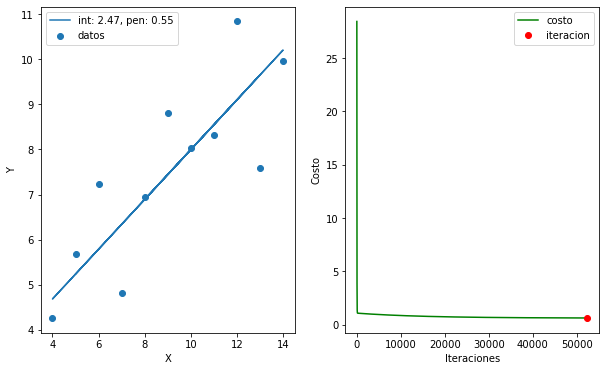

In [67]:
#Graficando la regresión lineal de X1 y Y1
plotModelo4(x1,y1,RL1,52408-1)

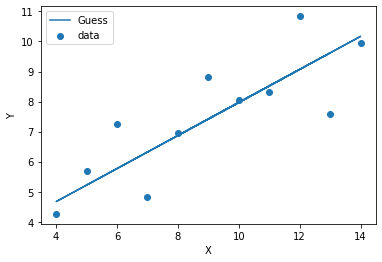

In [68]:
#Gráfica regresión lineal simple
plotGuess4(x1, y1, 2.47, 0.55)

Calculando y graficando la regresión lineal del **segundo** par de columnas del cuarteto de Anscombe

In [73]:
#Regresión lineal de x2 y y2
RL2=RegresionLineal(alpha=0.0003, max_iters=1000000, tols= 0.000001)
RL2.gradientDescent(x2,y2)

La función convergió con beta: [2.4729729  0.55227598] en la iteración 52416


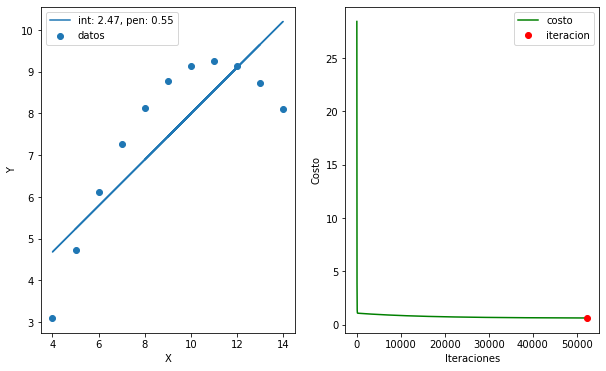

In [74]:
#Gráfica de regresión lineal de x2 y y2
plotModelo4(x2,y2,RL2,52416-1)

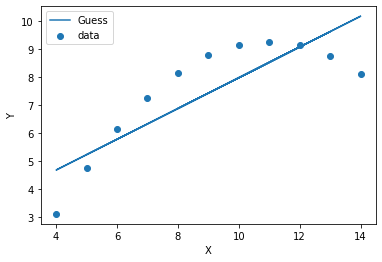

In [69]:
#Gráfica regresión lineal simple
plotGuess4(x2, y2, 2.47, 0.55)

Calculando la regresión lineal del **tercer** par de columnas del cuarteto de Anscombe

In [70]:
#Regresión lineal de x3 y y3
RL3=RegresionLineal(alpha=0.0003, max_iters=1000000, tols= 0.000001)
RL3.gradientDescent(x3,y3)

La función convergió con beta: [2.47453017 0.55200209] en la iteración 52433


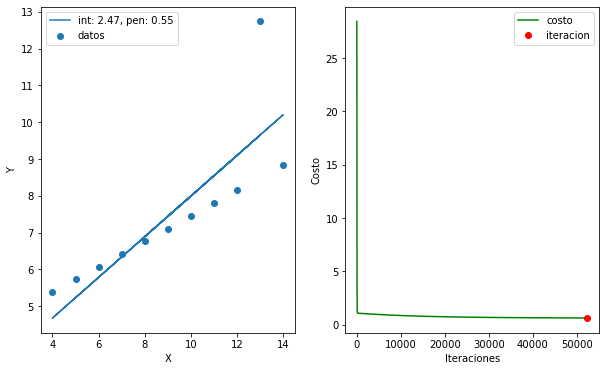

In [71]:
#Gráfica de regresión lineal de x3 y y3
plotModelo4(x3,y3,RL3,52433-1)

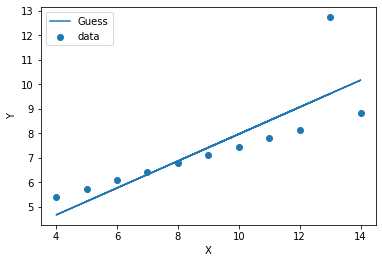

In [72]:
#Gráfica regresión lineal simple
plotGuess4(x3, y3, 2.47, 0.55)

Calculando la regresión lineal del **cuarto** par de columnas del cuarteto de Anscombe

In [73]:
#Regresión lineal de x4 y y4
RL4=RegresionLineal(alpha=0.0003, max_iters=1000000, tols= 0.000001)
RL4.gradientDescent(x4,y4)

La función convergió con beta: [2.47379826 0.55218436] en la iteración 52425


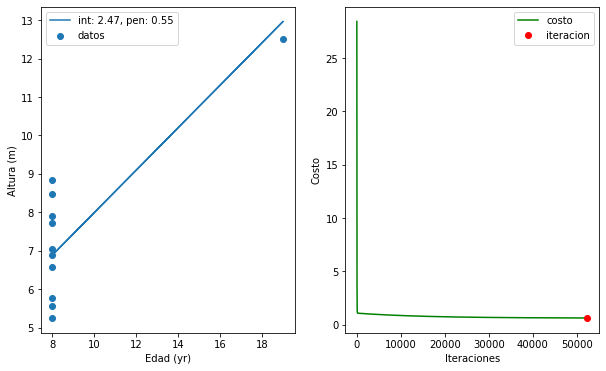

In [74]:
#Gráfica de regresión lineal de x4 y y4
plotModelo(x4,y4,RL4,52425-1)

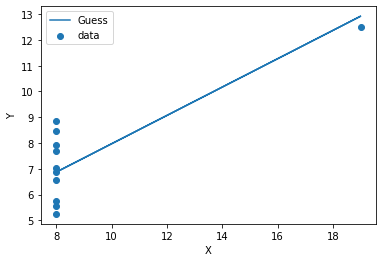

In [75]:
#Gráfica regresión lineal simple
plotGuess4(x4, y4, 2.47, 0.55)

#### ¿Qué sucede?

Notemos que en las cuatro gráficas obtenemos la siguiente ecuación de regresión lineal:

In [86]:
Eq(ysym, 0.55218436*(xsym) + 2.47379826)

Sin embargo, desde que graficamos los subplots podemos ver que la distribución de los datos es muy diferente. Por ejemplo, en los datos x1, y1 si se ve una relación lineal; sin embargo, en los datos x2, y2 el subplot muestra una especie de parábola cóncava. A la vez, al graficar los datos x3, y3 se obtiene una muy clara relación lineal sin embargo hay un punto que se escapa lo que hace que se modifique la pendiente. Por último, los datos de x4,y4 casi representan la linea x=8, pero por el punto (19,12), la linea cambia por completo. Esto nos muestra que si bien diferentes datos pueden tener la misma regresión lineal, cada uno puede tener una distribución totalmente diferente. Por esta razón, es importante graficar los datos antes de calcular la regresión lineal para no acabar con una falsa idea con respecto a su distribución. 

## Problema 5

##### Use el archivo `radioactive_decay.dat`

In [77]:
%cat radioactive_decay-Copy1.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


##### **(a)** Grafique los datos ¿Qué forma tienen?

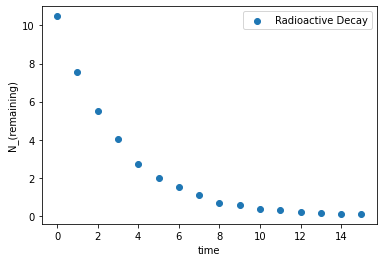

In [97]:
datos2= np.loadtxt("radioactive_decay-Copy1.txt",dtype="float", delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None, like=None)

time=[]
N = []

for i in datos2:
    time.append(float(i[0]))
    N.append (float(i[1]))
T = np.array(time)
N = np.array(N)

plt.scatter(T,N, label="Radioactive Decay")
plt.xlabel('time')
plt.ylabel('N_(remaining)')
plt.legend(loc="best")

La gráfica anterior es muy parecida (mas no igual) a la gráfica de la siguiente ecuación:

In [95]:
esym = Symbol('e')
Eq(ysym, esym**(-xsym+6))

Text(0, 0.5, 'N_(remaining)')

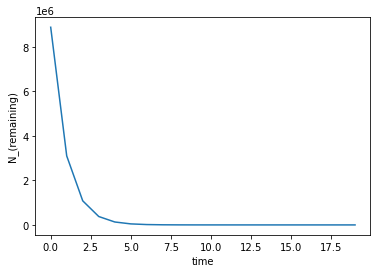

In [99]:
#Gráfica de la función propuesta
X = np.linspace(-10, 10, 20, endpoint=True)
C = np.exp(-X+6)
plt.plot(C)
plt.xlabel('time')
plt.ylabel('N_(remaining)')

##### **(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo.

Dado que la función es una exponencial, si aplicamos la función inversa, por definición, se obtendrá la función indentidad. Por lo que tomar el logaritmo natural de los valores de y (N_remaining) permitiría linealizar la función. 

In [100]:
#Aplicando ln a los valores de y para linearizar
lista = []
for i in N: #Toma cada elemento de la lista que contiene los valores de y
    lista.append(np.log(i))

Text(0, 0.5, 'N_(remaining)')

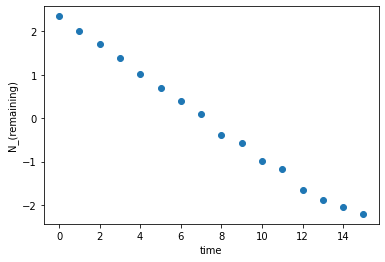

In [103]:
#Convirtiendo la lista ya con los logaritmos de y en un arreglo para poder graficar
logaritmos = np.array(lista)
#Graficando los nuevos datos "linearizados"
plt.scatter(T,logaritmos)
plt.xlabel('time')
plt.ylabel('N_(remaining)')

#### Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

In [104]:
lista2 = [] #Se crea una segunda lista en la que se van a añadir los logaritmos calculados previamente
for i in range(len(T)): #Se usa el len(T) porque es la cantidad de pares ordenados que tenemos
    lista2.append((T[i],lista[i]))

nuevosdatos = np.array(lista2) #Se crea un arreglo de 15 pares ordenados de x y logy
np.savetxt("transform_radioactive_decay-Copy1.txt",nuevosdatos)

#### **(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [105]:
#Se cargan los datos del archivo recién creado con np.loadtxt
datos3 = np.loadtxt("transform_radioactive_decay-Copy1.txt")
T3 = []
N3 = []
for i in range(len(datos3)): #Se añaden los datos cargados a las listas T3 y N3
    T3.append(datos3[i][0]) #En la posición 0 se encuentran las variables x
    N3.append(datos3[i][1]) #En la posición 1 se encuentran las variables y

time3=np.array(T3)
number3= np.array(N3)

In [106]:
#Ya que se tienen los dos arreglos con las correspondientes variables se puede calcular la regresión lineal
rlineal = RegresionLineal(alpha=0.003, max_iters=1000000, tols= 0.0000001)
rlineal.gradientDescent(time3,number3)

La función convergió con beta: [ 2.27548901 -0.31459673] en la iteración 5755


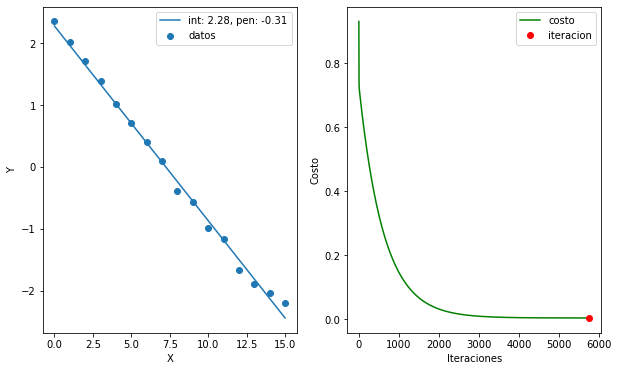

In [107]:
#[EXTRA] grafiquemos para verificar que todo funcionó bien :)
plotModelo4(time3,number3,rlineal,5755-1)

#### **(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? 

De acuerdo con la ecuación que obtuvimos al hacer la regresión lineal, los valores de $\beta$ que mejor se ajustan son [ 2.27548901 -0.31459673].

#### ¿Cuáles son el espacio sin transformar? Explique.

In [108]:
#Calculando la regresión lineal con los arreglos originales
RL_sintransf = RegresionLineal(alpha=0.003, max_iters=1000000, tols= 0.0000001)
RL_sintransf.gradientDescent(T,N)

La función convergió con beta: [ 6.43577297 -0.54728535] en la iteración 7016


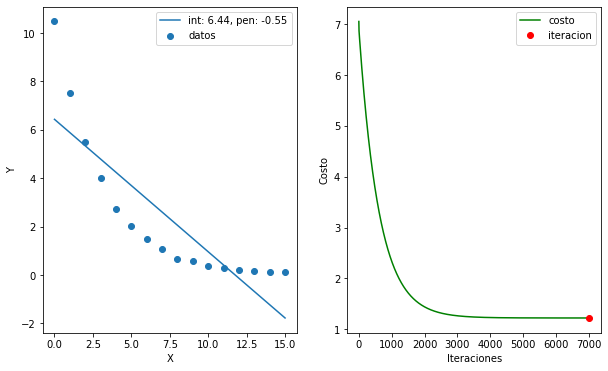

In [109]:
#Graficando la regresión lineal con los arreglos originales
plotModelo4(T,N,RL_sintransf,7016-1)

El espacio sin transformar son los puntos cuya gráfica es similiar a y=e^(-x+6). Para calcular as $\beta$ 's que mejor se ajustan en el espacio sin transformar hay que volver a hacer la regresión lineal pero tomando los arreglos iniciales T y N (antes de aplicar logaritmo). Por lo que las $\beta$ 's correspondientes son [ 6.43577297 -0.54728535], notemos que son unas betas muy diferentes, dado que la función es de la forma exponencial realmente no tiene mucho sentido hablar de betas que se ajusten.